In [1]:
import pandas as pd
import numpy as np
import glob
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filenames = glob.glob("data/*/*.wav")

In [3]:
len(filenames)

64727

In [4]:
ex_df = pd.DataFrame({'filename': filenames})

In [5]:
# build labels
def get_label(fn):
    return fn.split('/')[-2]
ex_df['label'] = ex_df.filename.map(get_label)

# build indices
unique_labels = ex_df.label.unique()
label_dict = dict(zip(unique_labels, range(len(unique_labels))))
ex_df['label_i'] = ex_df.label.map(label_dict)
ex_df.label.value_counts()

stop                  2380
seven                 2377
yes                   2377
zero                  2376
no                    2375
up                    2375
two                   2373
four                  2372
go                    2372
one                   2370
six                   2369
right                 2367
on                    2367
nine                  2364
down                  2359
off                   2357
five                  2357
three                 2356
left                  2353
eight                 2352
house                 1750
marvin                1746
dog                   1746
wow                   1745
happy                 1742
sheila                1734
tree                  1733
cat                   1733
bird                  1731
bed                   1713
_background_noise_       6
Name: label, dtype: int64

In [6]:
# remove background noise category
ex_df.label.where(ex_df.label != '_background_noise_', inplace=True)

ex_df.sample(5)

,filename,label,label_i
41020,data/go/022cd682_nohash_1.wav,go,20
1349,data/left/da1d320c_nohash_1.wav,left,0
31278,data/six/ab7b5acd_nohash_0.wav,six,16
35566,data/seven/b9cccd01_nohash_0.wav,seven,17
23033,data/zero/28ed6bc9_nohash_2.wav,zero,12


In [7]:
ex_df.label.value_counts()

stop      2380
yes       2377
seven     2377
zero      2376
no        2375
up        2375
two       2373
four      2372
go        2372
one       2370
six       2369
on        2367
right     2367
nine      2364
down      2359
off       2357
five      2357
three     2356
left      2353
eight     2352
house     1750
dog       1746
marvin    1746
wow       1745
happy     1742
sheila    1734
cat       1733
tree      1733
bird      1731
bed       1713
Name: label, dtype: int64

# Analysis on 20k samples

In [8]:
unique_labels

array(['left', 'eight', 'no', 'tree', 'nine', 'bed', 'dog',
       '_background_noise_', 'house', 'cat', 'bird', 'four', 'zero', 'on',
       'right', 'sheila', 'six', 'seven', 'down', 'one', 'go', 'happy',
       'two', 'yes', 'up', 'three', 'five', 'marvin', 'stop', 'wow', 'off'], dtype=object)

In [9]:
include_labels = ['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

In [10]:
def replace_unknown(label):
    if label not in include_labels:
        label = "unknown"
    return label

In [11]:
ex_df['label2'] = ex_df.label.apply(replace_unknown)

In [12]:
ex_df.sample(10)

,filename,label,label_i,label2
61961,data/wow/695c2127_nohash_0.wav,wow,29,unknown
40996,data/go/6adb8ad9_nohash_0.wav,go,20,go
8018,data/tree/6a27a9bf_nohash_0.wav,tree,3,unknown
42922,data/happy/bca56796_nohash_3.wav,happy,21,unknown
51763,data/up/20d3f11f_nohash_1.wav,up,24,up
1859,data/left/9190045a_nohash_0.wav,left,0,left
36821,data/down/36050ef3_nohash_4.wav,down,18,down
6439,data/no/747e69fd_nohash_1.wav,no,2,no
52605,data/three/798f702a_nohash_2.wav,three,25,unknown
44523,data/happy/ad5aeec2_nohash_0.wav,happy,21,unknown


In [13]:
ex_df.shape

(64727, 4)

In [14]:
include_labels.append("unknown")

In [15]:
label_dict = dict(zip(include_labels, range(len(include_labels))))
ex_df['label_i2'] = ex_df.label2.map(label_dict)
ex_df.sample(10)

,filename,label,label_i,label2,label_i2
49405,data/yes/8b39e36f_nohash_0.wav,yes,23,yes,9
35089,data/seven/9f63152b_nohash_0.wav,seven,17,unknown,10
2150,data/left/5e3dde6b_nohash_4.wav,left,0,left,2
45574,data/two/7f74626f_nohash_1.wav,two,22,unknown,10
44083,data/happy/5fe4a278_nohash_0.wav,happy,21,unknown,10
601,data/left/e6515415_nohash_0.wav,left,0,left,2
25754,data/on/e5c48e53_nohash_0.wav,on,13,on,5
36718,data/down/cc6ee39b_nohash_1.wav,down,18,down,0
29733,data/sheila/afb9e62e_nohash_1.wav,sheila,15,unknown,10
63972,data/off/39c13eed_nohash_0.wav,off,30,off,4


In [16]:
unknown_df = ex_df[ex_df.label_i2 == 10].sample(2400)

In [17]:
final_df = ex_df[ex_df.label_i2 != 10]

In [18]:
final_df = final_df.append(unknown_df)

In [19]:
final_df.label2.value_counts()

unknown    2400
stop       2380
yes        2377
no         2375
up         2375
go         2372
right      2367
on         2367
down       2359
off        2357
left       2353
Name: label2, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = final_df.filename
y = final_df.label_i2

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [23]:
y_train_vec = y_train.as_matrix()
y_test_vec = y_test.as_matrix()

In [24]:
#! pip install python_speech_features

In [25]:
import scipy.io.wavfile
from python_speech_features import mfcc

In [29]:
x_train[812]

'data/left/1890e5c3_nohash_0.wav'

In [30]:
rate, wave = scipy.io.wavfile.read(x_train[812])

In [31]:
mfcc_feat = mfcc(wave, rate, numcep=40, winlen=1/160, winstep=1/160, nfilt=40)

In [32]:
mfcc_feat.shape

(160, 40)

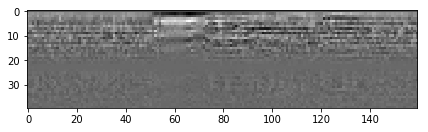

In [33]:
plt.figure(figsize=(7,7))
plt.imshow(mfcc_feat.T, cmap='binary')

In [34]:
def process_wavs(X, max_len = 16000, numcep=40, num_windows=160):
    x_mfcc = np.zeros((len(X), num_windows, numcep, 1))
    for i, fn in enumerate(X):
        rate, wave = scipy.io.wavfile.read(fn)
        wave = wave[:max_len]
        wave = np.pad(wave, (0, max_len-wave.shape[0]), 'minimum')
        mfcc_feat = mfcc(wave, rate, numcep=numcep, winlen=(1/num_windows), winstep=(1/num_windows), nfilt=numcep)
        x_mfcc[i,:,:,0] = mfcc_feat
    x_shift = x_mfcc - (np.mean(x_mfcc, axis=1, keepdims=True) + 1e-8)
    return x_shift

In [35]:
x_train_vec = process_wavs(x_train)
x_test_vec = process_wavs(x_test)

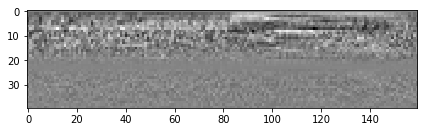

In [36]:
plt.figure(figsize=(7,7))
plt.imshow(x_train_vec[6,:,:,0].T, cmap='gray')

In [37]:
import pickle

In [38]:
# pickle.dump(x_train_vec, open('x_train_nov23.pkl', 'wb'))
# pickle.dump(x_test_vec, open('x_test_nov23.pkl', 'wb'))

In [39]:
print(max(y_test_vec))
max(y_test_vec)

10


10

In [40]:
num_labels = max(y_train) + 1

In [41]:
import keras
import keras.backend as K
# from keras.utils.vis_utils import model_to_dot
# from IPython.display import SVG
# import vis

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [87]:
#! pip install pydot

In [88]:
#! pip install graphviz

In [89]:
# model1 = keras.Sequential([
#     keras.layers.InputLayer(input_shape=x[0].shape),
#     keras.layers.Flatten(),
#     keras.layers.Dense(500, activation='relu'),
#     keras.layers.Dropout(.4),
#     keras.layers.Dense(250, activation='relu'),
#     keras.layers.Dropout(.4),
#     keras.layers.Dense(num_labels, activation='softmax')
# ])
# #SVG(model_to_dot(model1, show_shapes=True).create(prog='dot', format='svg'))
# model1.summary()

In [40]:
# model1.compile(loss='sparse_categorical_crossentropy', 
#                optimizer='nadam',
#                metrics=['accuracy'])

In [41]:
# history1 = model1.fit(x, y, batch_size=512, epochs=50, verbose=1, validation_split=0.2, 
#                       callbacks=[keras.callbacks.EarlyStopping(patience=5, verbose=1)])

In [42]:
# model2 = keras.Sequential([
#     keras.layers.InputLayer(input_shape=x[0].shape),
#     keras.layers.Conv2D(64, kernel_size=(20,8), padding='valid', activation='relu'),
#     keras.layers.MaxPool2D(pool_size=(2,2), padding='valid'),
#     keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(64, kernel_size=(10,4), padding='valid', activation='relu'),
#     keras.layers.MaxPool2D(pool_size=(2,2), padding='valid'),
#     keras.layers.BatchNormalization(),
#     keras.layers.Flatten(),
#     keras.layers.Dense(500, activation="relu"),
#     keras.layers.Dropout(.4),
#     keras.layers.Dense(250, activation="relu"),
#     keras.layers.Dropout(.4),
#     keras.layers.Dense(num_labels, activation="softmax")
# ])
# #SVG(model_to_dot(model2, show_shapes=True).create(prog="dot", format="svg"))
# model2.summary()

In [43]:
# model2.compile(loss='sparse_categorical_crossentropy', 
#                optimizer='nadam',
#                metrics=['accuracy'])

In [44]:
# history2 = model2.fit(x, y, batch_size=512, epochs=50, verbose=1, validation_split=0.2, 
#                       callbacks=[keras.callbacks.EarlyStopping(monitor='val_acc', patience=5,verbose=1)])

In [45]:
#! pip install sklearn

In [42]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [43]:
x_train_vec[0].shape

(160, 40, 1)

In [44]:
# define model
def CNN():
    # create model
    model = keras.Sequential([
        keras.layers.InputLayer(input_shape=(160,40,1)),
        keras.layers.Conv2D(64, kernel_size=(20,8), padding='valid', activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2,2), padding='valid'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(64, kernel_size=(10,4), padding='valid', activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2,2), padding='valid'),
        keras.layers.BatchNormalization(),
        keras.layers.Flatten(),
        keras.layers.Dense(500, activation="relu"),
        keras.layers.Dropout(.4),
        keras.layers.Dense(250, activation="relu"),
        keras.layers.Dropout(.4),
        keras.layers.Dense(num_labels, activation="softmax")
    ])
    #SVG(model_to_dot(model2, show_shapes=True).create(prog="dot", format="svg"))
    model.summary()
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', 
                   optimizer='nadam',
                   metrics=['accuracy'])
    return model

In [45]:
estimator = KerasClassifier(build_fn=CNN, batch_size=512, epochs=50, verbose=1, validation_split=0.2)

In [46]:
history = estimator.fit(x_train_vec, y_train_vec)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 160, 40, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 141, 33, 64)       10304     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 70, 16, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 70, 16, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 13, 64)        163904    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 6, 64)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 6, 64)         256       
__________

13979/13979 [==============================] - 19s 1ms/step - loss: 0.0767 - acc: 0.9761 - val_loss: 0.8858 - val_acc: 0.8418
Epoch 46/50
13979/13979 [==============================] - 19s 1ms/step - loss: 0.0786 - acc: 0.9757 - val_loss: 0.6172 - val_acc: 0.8744
Epoch 47/50
13979/13979 [==============================] - 19s 1ms/step - loss: 0.0682 - acc: 0.9787 - val_loss: 0.6236 - val_acc: 0.8744
Epoch 48/50
13979/13979 [==============================] - 19s 1ms/step - loss: 0.0519 - acc: 0.9834 - val_loss: 0.6295 - val_acc: 0.8787
Epoch 49/50
13979/13979 [==============================] - 19s 1ms/step - loss: 0.0556 - acc: 0.9819 - val_loss: 0.6065 - val_acc: 0.8787
Epoch 50/50
13979/13979 [==============================] - 19s 1ms/step - loss: 0.0570 - acc: 0.9823 - val_loss: 0.6498 - val_acc: 0.8781


In [47]:
y_train_pred = estimator.predict(x_train_vec)

17474/17474 [==============================] - 8s 486us/step


In [48]:
y_test_pred = estimator.predict(x_test_vec)

8608/8608 [==============================] - 5s 553us/step


In [45]:
# ! pip install seaborn

In [49]:
import seaborn as sns
from sklearn import metrics

In [50]:
metrics.accuracy_score(y_train_vec, y_train_pred)

0.9744191370035481

In [51]:
metrics.accuracy_score(y_test_vec, y_test_pred)

0.88255111524163565

In [52]:
metrics.recall_score(y_test_vec, y_test_pred, average=None)

array([ 0.92565056,  0.85642317,  0.91402116,  0.88615783,  0.89165629,
        0.92533333,  0.94881398,  0.92206077,  0.83476132,  0.95212766,
        0.66165414])

In [53]:
metrics.precision_score(y_test_vec, y_test_pred, average=None)

array([ 0.89461078,  0.88311688,  0.91523179,  0.91090426,  0.84934757,
        0.87515763,  0.90692124,  0.92572944,  0.79953107,  0.95721925,
        0.7916042 ])

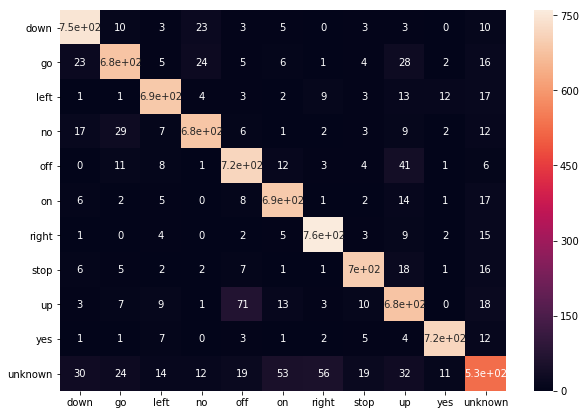

In [54]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test_vec, y_test_pred), annot=True, xticklabels=['down', 'go', 'left', 'no', 'off',
                                                                               'on', 'right', 'stop', 'up', 'yes',
                                                                               'unknown'], yticklabels=['down', 'go', 'left', 'no', 'off',
                                                                               'on', 'right', 'stop', 'up', 'yes',
                                                                               'unknown'])

In [55]:
test_df = final_df.loc()[x_test.index]

In [56]:
test_df['pred_label_i'] = y_test_pred

In [57]:
label_dict_rev = {v: k for k,v in label_dict.items()}

In [58]:
label_dict_rev

{0: 'down',
 1: 'go',
 2: 'left',
 3: 'no',
 4: 'off',
 5: 'on',
 6: 'right',
 7: 'stop',
 8: 'up',
 9: 'yes',
 10: 'unknown'}

In [59]:
test_df['pred_label'] = test_df.pred_label_i.map(label_dict_rev)

In [60]:
test_df[test_df.pred_label_i != test_df.label_i2][['filename', 'label', 'label2', 'pred_label']]

,filename,label,label2,pred_label
25773,data/on/4a1e736b_nohash_4.wav,on,on,off
60045,data/stop/65040d9b_nohash_0.wav,stop,stop,go
7446,data/tree/10467b06_nohash_0.wav,tree,unknown,up
5744,data/no/8134f43f_nohash_0.wav,no,no,up
5299,data/no/b9f46737_nohash_4.wav,no,no,left
48405,data/yes/8134f43f_nohash_3.wav,yes,yes,right
36592,data/down/6727b579_nohash_0.wav,down,down,no
28928,data/right/229978fd_nohash_1.wav,right,right,up
63047,data/off/ec201020_nohash_3.wav,off,off,up
7064,data/no/264f471d_nohash_4.wav,no,no,down


In [58]:
model2.save('model2_nov21.model')